## Kills/Deaths

In [2]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from pprint import pprint
import csv

In [9]:
file_data = "Resources/kills.csv"
df = pd.read_csv(file_data)
df.head(20)

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643
5,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.029,C9 LemonNation,TSM Dyrus,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,NaN,8559,8491
6,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.109,C9 Hai,TSM WildTurtle,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM Lustboy,8559,7924
7,http://matchhistory.na.leagueoflegends.com/en/...,bKills,28.989,C9 LemonNation,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,9178,9363
8,http://matchhistory.na.leagueoflegends.com/en/...,bKills,29.073,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,9566,9304
9,http://matchhistory.na.leagueoflegends.com/en/...,bKills,30.104,C9 Balls,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,4998,10314


In [10]:
kills_df = df[["Team", "Time", "Killer", "Victim"]]
kills_df.head()

,Team,Time,Killer,Victim
0,bKills,10.820,TSM Bjergsen,C9 Hai
1,bKills,16.286,TSM WildTurtle,C9 LemonNation
2,bKills,18.733,TSM Bjergsen,C9 Hai
3,bKills,18.880,TSM Dyrus,C9 Meteos
4,bKills,27.005,TSM Bjergsen,C9 Balls


In [11]:
kills_df = kills_df.dropna(how='any')

In [12]:
kills_df.count()

Team      190956
Time      190956
Killer    190956
Victim    190956
dtype: int64

In [13]:
killers = kills_df["Killer"].value_counts()
killers.head(25)

SKT Bang          1569
SKT Faker         1470
TSM Bjergsen      1382
C9 Sneaky         1149
C9 Jensen         1068
FW Maple          1013
FNC Rekkles        986
CLG Stixxay        944
SSG Crown          905
CLG Huhi           893
None               848
kt Score           824
G2 Perkz           805
TL Piglet          799
FW Karsa           756
IMT Pobelter       731
kt Arrow           728
CLG Darshan        712
UOL Vizicsacsi     700
TSM Hauntzer       688
TSM Doublelift     687
SSG CuVee          664
UOL Exileh         664
H2K Odoamne        656
FNC Febiven        625
Name: Killer, dtype: int64

In [14]:
victims = kills_df["Victim"].value_counts()
victims.head(25)

UOL Hylissang     864
None              848
UOL Vizicsacsi    843
CLG aphromoo      833
SSG CuVee         774
SKT Faker         761
SKT Wolf          759
TSM Svenskeren    650
C9 Sneaky         633
CLG Huhi          629
SKT Bang          619
SSG Crown         614
CLG Darshan       612
TSM Bjergsen      602
kt Score          600
CLG Xmithie       592
H2K Odoamne       590
TSM Hauntzer      585
TL Matt           559
CLG Stixxay       547
UOL Exileh        540
IMT Pobelter      508
G2 Perkz          501
NV Seraph         497
TL Piglet         493
Name: Victim, dtype: int64

Text(0.5, 1.0, 'Top 10 Killers')

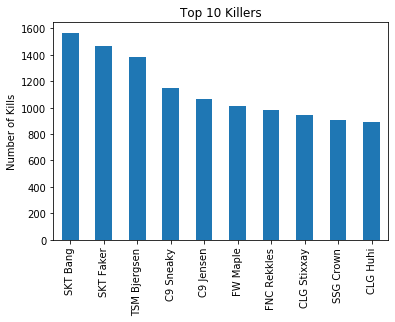

In [15]:
top_killers = kills_df["Killer"].value_counts()
top_killers[:10].plot(kind='bar')
plt.ylabel('Number of Kills')
plt.title("Top 10 Killers")

In [16]:
# Top Killers' Team Tags =
# SKT
# TSM
# C9
#FW
#FNC
#CLG
#SSG

Text(0.5, 1.0, '10 Most Killed')

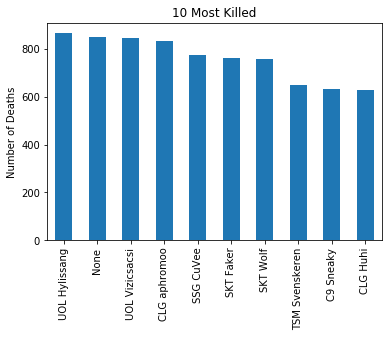

In [17]:
top_killers = kills_df["Victim"].value_counts()
top_killers[:10].plot(kind='bar')
plt.ylabel('Number of Deaths')
plt.title("10 Most Killed")

In [18]:
league_stats = "Resources/LeagueofLegends.csv"
lolstats = pd.read_csv(league_stats)
lolstats.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [19]:
stats_df = lolstats[["Year", "blueTeamTag", "bResult", "redTeamTag", "rResult"]]
stats_df

,Year,blueTeamTag,bResult,redTeamTag,rResult
0,2015,TSM,1,C9,0
1,2015,CST,0,DIG,1
2,2015,WFX,1,GV,0
3,2015,TIP,0,TL,1
4,2015,CLG,1,T8,0
...,...,...,...,...,...
7615,2018,YC,0,SUP,1
7616,2018,GAL,0,DP,1
7617,2018,SIN,0,DW,1
7618,2018,LGC,1,TTC,0


In [20]:
blue_wins = stats_df.groupby(["blueTeamTag"])
blue_win_count = blue_wins.sum()


In [21]:
blue_count = blue_win_count.sort_values("bResult", ascending=False)
blue_count.head(20)

,Year,bResult,rResult
blueTeamTag,,,
SKT,393134,146,49
TSM,294351,104,42
kt,328620,101,62
SSG,336693,99,68
FNC,304432,97,54
H2K,294347,95,51
CLG,310489,92,62
C9,308461,90,63
FW,250012,88,36


In [22]:
new_blue = blue_count.reset_index()
new_blue

,blueTeamTag,Year,bResult,rResult
0,SKT,393134,146,49
1,TSM,294351,104,42
2,kt,328620,101,62
3,SSG,336693,99,68
4,FNC,304432,97,54
...,...,...,...,...
237,FIS,2015,0,1
238,MOU,4032,0,2
239,BMR,4036,0,2
240,DLY,2015,0,1


In [23]:
renamed_blue = new_blue.rename(columns={'bResult':'Win', 'rResult':'Loss', 'blueTeamTag':'Team Tag'})
renamed_blue

,Team Tag,Year,Win,Loss
0,SKT,393134,146,49
1,TSM,294351,104,42
2,kt,328620,101,62
3,SSG,336693,99,68
4,FNC,304432,97,54
...,...,...,...,...
237,FIS,2015,0,1
238,MOU,4032,0,2
239,BMR,4036,0,2
240,DLY,2015,0,1


In [24]:
red_wins = stats_df.groupby(["redTeamTag"])
red_count = red_wins.sum()

In [25]:
red_win_count = red_count.sort_values("rResult", ascending=False)
red_win_count.head(20)

,Year,bResult,rResult
redTeamTag,,,
SKT,419358,67,141
TSM,346778,69,103
C9,306454,64,88
kt,290313,59,85
SSG,312499,73,82
FW,241936,43,77
CLG,284288,68,73
G2,225852,42,70
ahq,181439,22,68


In [26]:
renamed_red = red_win_count.reset_index()
renamed_red

,redTeamTag,Year,bResult,rResult
0,SKT,419358,67,141
1,TSM,346778,69,103
2,C9,306454,64,88
3,kt,290313,59,85
4,SSG,312499,73,82
...,...,...,...,...
238,COW,4030,2,0
239,TS,2015,1,0
240,TSW,14119,7,0
241,CLB,2015,1,0


In [27]:
new_red = renamed_red.rename(columns={'bResult':'Loss', 'rResult':'Win', 'redTeamTag':'Team Tag'})
new_red

,Team Tag,Year,Loss,Win
0,SKT,419358,67,141
1,TSM,346778,69,103
2,C9,306454,64,88
3,kt,290313,59,85
4,SSG,312499,73,82
...,...,...,...,...
238,COW,4030,2,0
239,TS,2015,1,0
240,TSW,14119,7,0
241,CLB,2015,1,0


In [28]:
final_stats = pd.merge(new_red, renamed_blue, on="Team Tag", how="inner")
final_stats

,Team Tag,Year_x,Loss_x,Win_x,Year_y,Win_y,Loss_y
0,SKT,419358,67,141,393134,146,49
1,TSM,346778,69,103,294351,104,42
2,C9,306454,64,88,308461,90,63
3,kt,290313,59,85,328620,101,62
4,SSG,312499,73,82,336693,99,68
...,...,...,...,...,...,...,...
234,COW,4030,2,0,6045,2,1
235,TS,2015,1,0,2015,0,1
236,TSW,14119,7,0,14119,0,7
237,CLB,2015,1,0,2015,0,1


In [29]:
clean_stats = final_stats.rename(columns={"Loss_x":"Loss", "Win_x":"Win"})
clean_stats

,Team Tag,Year_x,Loss,Win,Year_y,Win_y,Loss_y
0,SKT,419358,67,141,393134,146,49
1,TSM,346778,69,103,294351,104,42
2,C9,306454,64,88,308461,90,63
3,kt,290313,59,85,328620,101,62
4,SSG,312499,73,82,336693,99,68
...,...,...,...,...,...,...,...
234,COW,4030,2,0,6045,2,1
235,TS,2015,1,0,2015,0,1
236,TSW,14119,7,0,14119,0,7
237,CLB,2015,1,0,2015,0,1


In [30]:
clean_stats["Win Total"] = clean_stats["Win"]+clean_stats["Win_y"]
clean_stats["Loss Total"] = clean_stats["Loss"]+clean_stats["Loss_y"]
clean_stats

,Team Tag,Year_x,Loss,Win,Year_y,Win_y,Loss_y,Win Total,Loss Total
0,SKT,419358,67,141,393134,146,49,287,116
1,TSM,346778,69,103,294351,104,42,207,111
2,C9,306454,64,88,308461,90,63,178,127
3,kt,290313,59,85,328620,101,62,186,121
4,SSG,312499,73,82,336693,99,68,181,141
...,...,...,...,...,...,...,...,...,...
234,COW,4030,2,0,6045,2,1,2,3
235,TS,2015,1,0,2015,0,1,0,2
236,TSW,14119,7,0,14119,0,7,0,14
237,CLB,2015,1,0,2015,0,1,0,2


In [31]:
final_scores = clean_stats[["Team Tag", "Win Total", "Loss Total"]]
final_scores.head(20)

,Team Tag,Win Total,Loss Total
0,SKT,287,116
1,TSM,207,111
2,C9,178,127
3,kt,186,121
4,SSG,181,141
5,FW,165,79
6,CLG,165,130
7,G2,143,83
8,ahq,144,42
9,UOL,133,128


In [32]:
# Top Killers' Team Tags =
# SKT
# TSM
# C9
#FW
#FNC
#CLG
#SSG


Text(0.5, 1.0, 'SKT Match Results')

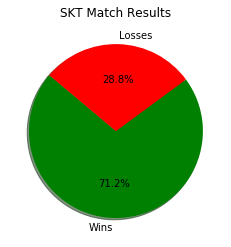

In [3]:
#SKT PIE CHART
skt_results = ["Wins","Losses"]
skt_counts = [287, 116]
skt_colors = ["green","red"]

plt.pie(skt_counts, labels=skt_results, colors=skt_colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("SKT Match Results")

Text(0.5, 1.0, 'TSM Match Results')

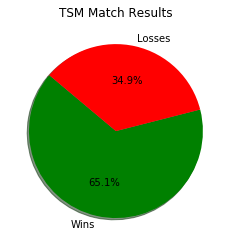

In [4]:
#TSM PIE CHART
tsm_results = ["Wins","Losses"]
tsm_counts = [207, 111]
tsm_colors = ["green","red"]

plt.pie(tsm_counts, labels=tsm_results, colors=tsm_colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("TSM Match Results")

Text(0.5, 1.0, 'C9 Match Results')

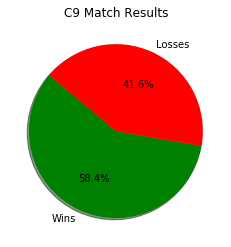

In [5]:
#C9 PIE CHART 
c9_results = ["Wins","Losses"]
c9_counts = [178, 127]
c9_colors = ["green","red"]

plt.pie(c9_counts, labels=c9_results, colors=c9_colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("C9 Match Results")

Text(0.5, 1.0, 'FW Match Results')

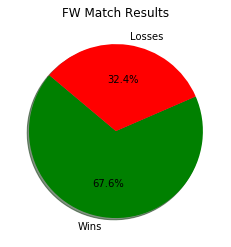

In [6]:
#FW PIE CHART
fw_results = ["Wins","Losses"]
fw_counts = [165, 79]
fw_colors = ["green","red"]

plt.pie(fw_counts, labels=fw_results, colors=fw_colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("FW Match Results")

Text(0.5, 1.0, 'SSG Match Results')

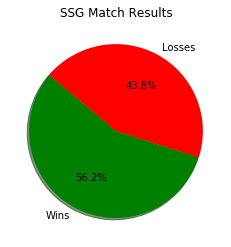

In [7]:
#SSG PIE CHART
ssg_results = ["Wins","Losses"]
ssg_counts = [181, 141]
ssg_colors = ["green","red"]

plt.pie(ssg_counts, labels=ssg_results, colors=ssg_colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("SSG Match Results")

Text(0.5, 1.0, 'FNC Match Results')

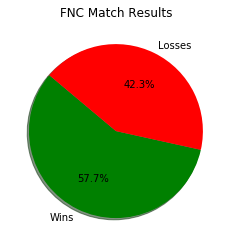

In [8]:
#FNC PIE CHART
fnc_results = ["Wins","Losses"]
fnc_counts = [162, 119]
fnc_colors = ["green","red"]

plt.pie(fnc_counts, labels=fnc_results, colors=fnc_colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("FNC Match Results")

Text(0.5, 1.0, 'CLG Match Results')

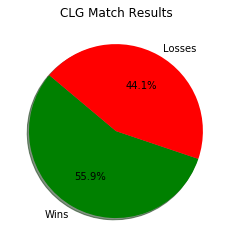

In [9]:
#CLG PIE CHART 
clg_results = ["Wins","Losses"]
clg_counts = [165, 130]
clg_colors = ["green","red"]

plt.pie(clg_counts, labels=clg_results, colors=clg_colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("CLG Match Results")